In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p /content/LibriSpeech
!tar -xvzf /content/drive/MyDrive/LibriSpeech/dev-clean.tar.gz -C /content/LibriSpeech

LibriSpeech/LICENSE.TXT
LibriSpeech/README.TXT
LibriSpeech/CHAPTERS.TXT
LibriSpeech/SPEAKERS.TXT
LibriSpeech/BOOKS.TXT
LibriSpeech/dev-clean/
LibriSpeech/dev-clean/2277/
LibriSpeech/dev-clean/2277/149896/
LibriSpeech/dev-clean/2277/149896/2277-149896-0026.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0005.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0033.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0006.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0018.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0034.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0021.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0015.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0012.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0027.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0007.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0030.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0011.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0009.flac
LibriSpeech

In [3]:
import os
from glob import glob

flac_files = glob('/content/LibriSpeech/LibriSpeech/dev-clean/**/*.flac', recursive=True)

print("Total FLAC files found:", len(flac_files))
print("Sample files:\n", flac_files[:5])

Total FLAC files found: 2703
Sample files:
 ['/content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0008.flac', '/content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0001.flac', '/content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0012.flac', '/content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0013.flac', '/content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0004.flac']


In [4]:
import torchaudio

sample_path = flac_files[0]
print("Sample audio path:", sample_path)

waveform, sample_rate = torchaudio.load(sample_path)
print("Waveform shape:", waveform.shape)
print("Sample rate:", sample_rate)

trans_file = sample_path.rsplit('-', 1)[0] + '.trans.txt'
print("\nTranscription file path:", trans_file)

with open(trans_file, 'r') as f:
    lines = f.readlines()

utterance_id = os.path.basename(sample_path).replace('.flac', '')
transcription = [line.strip().split(' ', 1)[1] for line in lines if line.startswith(utterance_id)][0]
print("\nTranscription:\n", transcription)

Sample audio path: /content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280-0008.flac
Waveform shape: torch.Size([1, 72320])
Sample rate: 16000

Transcription file path: /content/LibriSpeech/LibriSpeech/dev-clean/174/84280/174-84280.trans.txt

Transcription:
 YOU WERE WRONG IN ALL THAT I SAID SHE KEPT HER FAITH WITH YOU


MFCC shape: torch.Size([1, 13, 453])


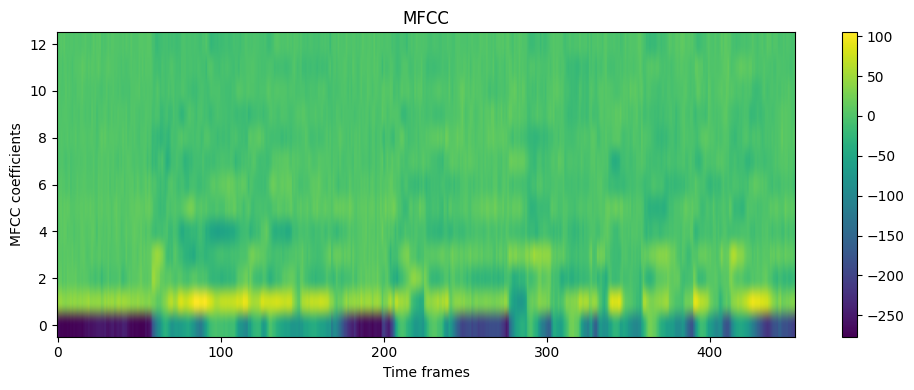

In [5]:
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# Define MFCC extractor
mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={
        'n_fft': 400,
        'hop_length': 160,
        'n_mels': 40,
        'center': True,
        'power': 2.0
    }
)

# Apply transform
mfcc = mfcc_transform(waveform)
print("MFCC shape:", mfcc.shape)  # (channel, n_mfcc, time)

# Visualize
plt.figure(figsize=(10, 4))
plt.imshow(mfcc[0].numpy(), origin='lower', aspect='auto', cmap='viridis')
plt.title('MFCC')
plt.xlabel('Time frames')
plt.ylabel('MFCC coefficients')
plt.colorbar()
plt.tight_layout()
plt.show()

In [6]:
!apt-get install -qq libsndfile1
!git clone https://github.com/audeering/opensmile.git
%cd opensmile
!mkdir build && cd build && cmake .. && make -j4

Cloning into 'opensmile'...
remote: Enumerating objects: 1830, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 1830 (delta 19), reused 15 (delta 15), pack-reused 1793 (from 2)
Receiving objects: 100% (1830/1830), 10.78 MiB | 21.51 MiB/s, done.
Resolving deltas: 100% (693/693), done.
/content/opensmile
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- D

In [7]:
!find /content/opensmile -name SMILExtract

/content/opensmile/build/progsrc/smilextract/SMILExtract


In [8]:
!find /content/opensmile -name eGeMAPSv02.conf

/content/opensmile/config/egemaps/v02/eGeMAPSv02.conf


In [9]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [11]:
!ffmpeg -i /content/LibriSpeech/LibriSpeech/dev-clean/251/136532/251-136532-0023.flac \
  /content/251-136532-0023.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [12]:
! /content/opensmile/build/progsrc/smilextract/SMILExtract \
  -C /content/opensmile/config/egemaps/v02/eGeMAPSv02.conf \
  -I /content/251-136532-0023.wav \
  -csvoutput /content/egemaps_0023.csv \
  -appendcsv 0 \
  -timestampcsv 0 \
  -headercsv 1

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: /content/opensmile/config/egemaps/v02/eGeMAPSv02.conf
(MSG) [2] cComponentManager: successfully registered 97 component types.
(MSG) [2] instance 'gemapsv01b_logSpectral': logSpecFloor = -140.00  (specFloor = 1.000000e-14)
(MSG) [2] instance 'egemapsv02_logSpectral_flux': logSpecFloor = -140.00  (specFloor = 1.000000e-14)
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'arffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (78 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single th

In [13]:
import pandas as pd

df = pd.read_csv('/content/egemaps_0023.csv', sep=';')
print("Shape:", df.shape)
df.head()

Shape: (1, 89)


,name,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,'unknown',26.98773,0.18037,22.9679,26.84871,30.48153,7.51363,246.7396,468.5849,18.36287,...,0.005158,0.010132,0.182393,4.295943,2.641057,0.229091,0.173517,0.128636,0.124765,-20.61845


In [14]:
flac_files = glob('/content/LibriSpeech/LibriSpeech/dev-clean/**/*.flac', recursive=True)
flac_files = sorted(flac_files)[:500]

os.makedirs('/content/wav_files', exist_ok=True)
os.makedirs('/content/egemaps', exist_ok=True)

print("Total files selected:", len(flac_files))

Total files selected: 500


In [15]:
from tqdm import tqdm
import subprocess

for path in tqdm(flac_files, desc="Converting FLAC to WAV"):
    fname = os.path.basename(path).replace('.flac', '.wav')
    wav_path = os.path.join('/content/wav_files', fname)

    if not os.path.exists(wav_path):
        subprocess.run([
            'ffmpeg', '-y',
            '-i', path,
            wav_path
        ], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

Converting FLAC to WAV: 100%|██████████| 500/500 [01:05<00:00,  7.63it/s]


In [16]:
smile_path = "/content/opensmile/build/progsrc/smilextract/SMILExtract"
config_path = "/content/opensmile/config/egemaps/v02/eGeMAPSv02.conf"

for wav_file in tqdm(sorted(os.listdir('/content/wav_files')), desc="Extracting eGeMAPS"):
    input_wav = os.path.join('/content/wav_files', wav_file)
    output_csv = os.path.join('/content/egemaps', wav_file.replace('.wav', '.csv'))

    subprocess.run([
        smile_path,
        "-C", config_path,
        "-I", input_wav,
        "-csvoutput", output_csv,
        "-appendcsv", "0",
        "-timestampcsv", "0",
        "-headercsv", "1"
    ], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

Extracting eGeMAPS: 100%|██████████| 500/500 [02:28<00:00,  3.37it/s]


In [17]:
egemaps_dir = '/content/egemaps'
all_dfs = []

for file in sorted(os.listdir(egemaps_dir)):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(egemaps_dir, file), sep=';')
        df['filename'] = file.replace('.csv', '')
        all_dfs.append(df)

final_df = pd.concat(all_dfs, ignore_index=True)
print("Final shape:", final_df.shape)
final_df.to_csv('/content/egemaps_500.csv', index=False)

Final shape: (500, 90)


In [18]:
egemaps_dir = '/content/egemaps'
expected_cols = 89
corrupt_files = []

for file in sorted(os.listdir(egemaps_dir)):
    if file.endswith('.csv'):
        path = os.path.join(egemaps_dir, file)
        try:
            df = pd.read_csv(path, sep=';')
            if df.shape[1] != expected_cols:
                corrupt_files.append((file, df.shape))
        except Exception as e:
            corrupt_files.append((file, str(e)))

print(f"\n Valid files: {500 - len(corrupt_files)} / 500")
print(f" Corrupt or mismatched files: {len(corrupt_files)}")
if corrupt_files:
    print("\nHere are a few examples:\n", corrupt_files[:5])


 Valid files: 500 / 500
 Corrupt or mismatched files: 0


In [19]:
for file in sorted(os.listdir(egemaps_dir)):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(egemaps_dir, file), sep=';')
        print(file, df.shape)
        print(df.columns.tolist())
        break

1272-128104-0000.csv (1, 89)
['name', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm'

Total CSV files used: 500
Sample files: ['1272-128104-0000.csv', '1272-128104-0001.csv', '1272-128104-0002.csv', '1272-128104-0003.csv', '1272-128104-0004.csv']


<ipython-input-41-8f68eb5da93d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(row[0], str):
<ipython-input-41-8f68eb5da93d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(row[0], str):
<ipython-input-41-8f68eb5da93d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(row[0], str):
<ipython-input-41-8f68eb5da93d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprec

Shape of X: (500, 88)
Sample arousal: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Sample valence: [0.69816171 0.53609637 0.30952762 0.81379502 0.68473117]


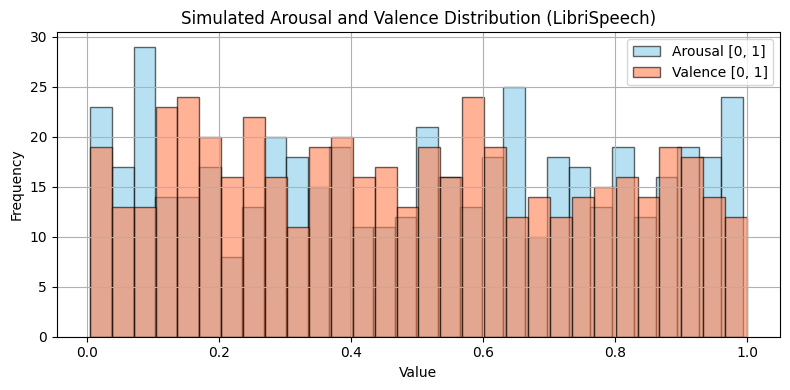

Saved: X_libri.npy, arousal_libri.npy, valence_libri.npy


In [41]:
import matplotlib.pyplot as plt

feature_folder = "/content/egemaps"

# === List first 500 CSVs ===
csv_files = sorted([f for f in os.listdir(feature_folder) if f.endswith(".csv")])[:500]
print("Total CSV files used:", len(csv_files))
print("Sample files:", csv_files[:5])

# === Extract eGeMAPS features (88 values per file) ===
X = []
for f in csv_files:
    df = pd.read_csv(os.path.join(feature_folder, f), sep=';')
    row = df.iloc[0]
    if isinstance(row[0], str):
        row = row[1:]  # Skip string columns like 'name'
    X.append(row.astype(float).values)

X = np.stack(X)
print("Shape of X:", X.shape)  # (500, 88)

# === Simulate arousal and valence values in [0, 1] ===
np.random.seed(42)
arousal = np.random.uniform(0, 1, size=X.shape[0])
valence = np.random.uniform(0, 1, size=X.shape[0])

print("Sample arousal:", arousal[:5])
print("Sample valence:", valence[:5])

# === Visualize Distribution ===
plt.figure(figsize=(8, 4))
plt.hist(arousal, bins=30, alpha=0.6, label='Arousal [0, 1]', color='skyblue', edgecolor='black')
plt.hist(valence, bins=30, alpha=0.6, label='Valence [0, 1]', color='coral', edgecolor='black')
plt.title("Simulated Arousal and Valence Distribution (LibriSpeech)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Save arrays ===
np.save("/content/X_libri.npy", X)
np.save("/content/arousal_libri.npy", arousal)
np.save("/content/valence_libri.npy", valence)

print("Saved: X_libri.npy, arousal_libri.npy, valence_libri.npy")

In [42]:
from scipy.stats import pearsonr
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# === Load data ===
X = np.load("/content/X_libri.npy")  # (500, 88)
arousal = np.load("/content/arousal_libri.npy")
valence = np.load("/content/valence_libri.npy")

# === Reshape for LSTM (batch, timesteps, features) ===
X = X[:, np.newaxis, :]  # (500, 1, 88)

# === Split train-test for both targets ===
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X, arousal, test_size=0.2, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X, valence, test_size=0.2, random_state=42)

# === CCC function ===
def concordance_correlation_coefficient(y_true, y_pred):
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        return float('nan')
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    cor, _ = pearsonr(y_true, y_pred)
    return (2 * cor * np.sqrt(var_true) * np.sqrt(var_pred)) / \
           (var_true + var_pred + (mean_true - mean_pred)**2)

# === Define model builder ===
def build_lstm_model():
    inp = Input(shape=(1, 88))
    x = LSTM(64, return_sequences=True)(inp)
    x = LSTM(64)(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- LSTM: AROUSAL ---")
model_lstm_ar = build_lstm_model()
model_lstm_ar.compile(optimizer='adam', loss='mse')
history_lstm_ar = model_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_ar = model_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_ar = model_lstm_ar.predict(X_test_ar).flatten()
ccc_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_ar)

print("LSTM Arousal Test MSE:", round(loss_ar, 4))
print("LSTM Arousal Test CCC:", round(ccc_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- LSTM: VALENCE ---")
model_lstm_val = build_lstm_model()
model_lstm_val.compile(optimizer='adam', loss='mse')
history_lstm_val = model_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_val = model_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_val = model_lstm_val.predict(X_test_val).flatten()
ccc_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_val)

print("LSTM Valence Test MSE:", round(loss_val, 4))
print("LSTM Valence Test CCC:", round(ccc_val, 4))


--- LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0893 - val_loss: 0.0860
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0889 - val_loss: 0.0856
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0942 - val_loss: 0.0862
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0902 - val_loss: 0.0857
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0898 - val_loss: 0.0864
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0929 - val_loss: 0.0857
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - val_loss: 0.0858
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0838 - val_loss: 0.0870
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0896 - val_loss: 0.0867
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0845 - val_loss: 0.0866
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0907 - val_loss: 0.0861
Epoch 12/70
134/134 ━━━━━━━

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Input

# === TDNN model builder ===
def build_tdnn_model():
    model = Sequential([
        Input(shape=(1, 88)),
        Conv1D(64, kernel_size=3, padding='same', dilation_rate=1, activation='relu'),
        Conv1D(64, kernel_size=3, padding='same', dilation_rate=2, activation='relu'),
        Conv1D(64, kernel_size=3, padding='same', dilation_rate=3, activation='relu'),
        Conv1D(64, kernel_size=3, padding='same', dilation_rate=4, activation='relu'),
        GlobalAveragePooling1D(),
        Dense(1, activation='sigmoid')  # Output in [0, 1]
    ])
    return model

# ========== Train for AROUSAL ==========
print("\n--- TDNN: AROUSAL ---")
model_tdnn_ar = build_tdnn_model()
model_tdnn_ar.compile(optimizer='adam', loss='mse')
history_tdnn_ar = model_tdnn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_tdnn_ar = model_tdnn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_tdnn_ar = model_tdnn_ar.predict(X_test_ar).flatten()
ccc_tdnn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_tdnn_ar)

print("TDNN Arousal Test MSE:", round(loss_tdnn_ar, 4))
print("TDNN Arousal Test CCC:", round(ccc_tdnn_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- TDNN: VALENCE ---")
model_tdnn_val = build_tdnn_model()
model_tdnn_val.compile(optimizer='adam', loss='mse')
history_tdnn_val = model_tdnn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_tdnn_val = model_tdnn_val.evaluate(X_test_val, y_test_val)
y_pred_tdnn_val = model_tdnn_val.predict(X_test_val).flatten()
ccc_tdnn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_tdnn_val)

print("TDNN Valence Test MSE:", round(loss_tdnn_val, 4))
print("TDNN Valence Test CCC:", round(ccc_tdnn_val, 4))


--- TDNN: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3482 - val_loss: 0.3584
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3368 - val_loss: 0.3584
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3632 - val_loss: 0.3584
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3363 - val_loss: 0.3584
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3437 - val_loss: 0.3584
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3318 - val_loss: 0.3584
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3502 - val_loss: 0.3584
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3189 - val_loss: 0.3584
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3260 - val_loss: 0.3584
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3521 - val_loss: 0.3584
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3451 - val_loss: 0.3584
Epoch 12/70
134/134 ━━━━━━━━━

In [44]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# === Multi-Head Attention Model ===
def build_attention_model():
    inp = Input(shape=(1, 88))  # (batch, time, features)
    x = MultiHeadAttention(num_heads=4, key_dim=16)(inp, inp)
    x = LayerNormalization()(x)
    x = Dense(64, activation='relu')(x)

    x = MultiHeadAttention(num_heads=4, key_dim=16)(x, x)
    x = LayerNormalization()(x)
    x = Dense(64, activation='relu')(x)

    x = GlobalAveragePooling1D()(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- Attention: AROUSAL ---")
model_attn_ar = build_attention_model()
model_attn_ar.compile(optimizer='adam', loss='mse')
history_attn_ar = model_attn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_ar = model_attn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_ar = model_attn_ar.predict(X_test_ar).flatten()
ccc_attn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_ar)

print("Attention Arousal Test MSE:", round(loss_attn_ar, 4))
print("Attention Arousal Test CCC:", round(ccc_attn_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- Attention: VALENCE ---")
model_attn_val = build_attention_model()
model_attn_val.compile(optimizer='adam', loss='mse')
history_attn_val = model_attn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_val = model_attn_val.evaluate(X_test_val, y_test_val)
y_pred_attn_val = model_attn_val.predict(X_test_val).flatten()
ccc_attn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_val)

print("Attention Valence Test MSE:", round(loss_attn_val, 4))
print("Attention Valence Test CCC:", round(ccc_attn_val, 4))


--- Attention: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1163 - val_loss: 0.1013
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1003 - val_loss: 0.0870
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - val_loss: 0.0859
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0943 - val_loss: 0.0885
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0953 - val_loss: 0.0883
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0954 - val_loss: 0.0855
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0891 - val_loss: 0.0857
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0875 - val_loss: 0.0855
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0880 - val_loss: 0.0881
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0894 - val_loss: 0.0862
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0895 - val_loss: 0.0872
Epoch 12/70
134/134 ━━━━

<ipython-input-42-97a16b7c700a>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1157 - val_loss: 0.0768
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0971 - val_loss: 0.0783
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0895 - val_loss: 0.0779
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - val_loss: 0.0773
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0842 - val_loss: 0.0920
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0854 - val_loss: 0.0782
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0891 - val_loss: 0.0831
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0794 - val_loss: 0.0848
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0885 - val_loss: 0.0767
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0861 - val_loss: 0.0774
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0846 - val_loss: 0.0768
Epoch 12/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0

In [45]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# === TDNN + LSTM Model ===
def build_tdnn_lstm_model():
    inp = Input(shape=(1, 88))

    # TDNN block (Conv1D layers)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(inp)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)

    # LSTM block
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- TDNN + LSTM: AROUSAL ---")
model_tdnn_lstm_ar = build_tdnn_lstm_model()
model_tdnn_lstm_ar.compile(optimizer='adam', loss='mse')
history_tdnn_lstm_ar = model_tdnn_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_tdnn_lstm_ar = model_tdnn_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_tdnn_lstm_ar = model_tdnn_lstm_ar.predict(X_test_ar).flatten()
ccc_tdnn_lstm_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_tdnn_lstm_ar)

print("TDNN + LSTM Arousal Test MSE:", round(loss_tdnn_lstm_ar, 4))
print("TDNN + LSTM Arousal Test CCC:", round(ccc_tdnn_lstm_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- TDNN + LSTM: VALENCE ---")
model_tdnn_lstm_val = build_tdnn_lstm_model()
model_tdnn_lstm_val.compile(optimizer='adam', loss='mse')
history_tdnn_lstm_val = model_tdnn_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_tdnn_lstm_val = model_tdnn_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_tdnn_lstm_val = model_tdnn_lstm_val.predict(X_test_val).flatten()
ccc_tdnn_lstm_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_tdnn_lstm_val)

print("TDNN + LSTM Valence Test MSE:", round(loss_tdnn_lstm_val, 4))
print("TDNN + LSTM Valence Test CCC:", round(ccc_tdnn_lstm_val, 4))


--- TDNN + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0965 - val_loss: 0.0864
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0867 - val_loss: 0.0857
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0917 - val_loss: 0.0872
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0919 - val_loss: 0.0859
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0886 - val_loss: 0.0856
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0924 - val_loss: 0.0857
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0872 - val_loss: 0.0862
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0979 - val_loss: 0.0863
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0898 - val_loss: 0.0862
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0976 - val_loss: 0.0858
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0913 - val_loss: 0.0860
Epoch 12/70
134/134 

<ipython-input-42-97a16b7c700a>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0871 - val_loss: 0.0769
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0849 - val_loss: 0.0770
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0828 - val_loss: 0.0785
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0828 - val_loss: 0.0776
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0844 - val_loss: 0.0783
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0796 - val_loss: 0.0777
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0818 - val_loss: 0.0771
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0851 - val_loss: 0.0780
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0799 - val_loss: 0.0777
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0823 - val_loss: 0.0787
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0824 - val_loss: 0.0784
Epoch 12/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 

In [46]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Conv1D, GlobalAveragePooling1D, Dense

# === Attention + TDNN Model ===
def build_attention_tdnn_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # TDNN block (Conv1D stack)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)

    x = GlobalAveragePooling1D()(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- Attention + TDNN: AROUSAL ---")
model_attn_tdnn_ar = build_attention_tdnn_model()
model_attn_tdnn_ar.compile(optimizer='adam', loss='mse')
history_attn_tdnn_ar = model_attn_tdnn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_tdnn_ar = model_attn_tdnn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_tdnn_ar = model_attn_tdnn_ar.predict(X_test_ar).flatten()
ccc_attn_tdnn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_tdnn_ar)

print("Attention + TDNN Arousal Test MSE:", round(loss_attn_tdnn_ar, 4))
print("Attention + TDNN Arousal Test CCC:", round(ccc_attn_tdnn_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- Attention + TDNN: VALENCE ---")
model_attn_tdnn_val = build_attention_tdnn_model()
model_attn_tdnn_val.compile(optimizer='adam', loss='mse')
history_attn_tdnn_val = model_attn_tdnn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_tdnn_val = model_attn_tdnn_val.evaluate(X_test_val, y_test_val)
y_pred_attn_tdnn_val = model_attn_tdnn_val.predict(X_test_val).flatten()
ccc_attn_tdnn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_tdnn_val)

print("Attention + TDNN Valence Test MSE:", round(loss_attn_tdnn_val, 4))
print("Attention + TDNN Valence Test CCC:", round(ccc_attn_tdnn_val, 4))


--- Attention + TDNN: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0878 - val_loss: 0.0889
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1029 - val_loss: 0.0864
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0916 - val_loss: 0.0861
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0882 - val_loss: 0.0864
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0921 - val_loss: 0.0862
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0905 - val_loss: 0.0860
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0875 - val_loss: 0.0861
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0877 - val_loss: 0.0859
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0937 - val_loss: 0.0860
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0867 - val_loss: 0.0861
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0927 - val_loss: 0.0861
Epoch 12/70
134/

<ipython-input-42-97a16b7c700a>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


In [47]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, LSTM, Dense

# === Attention + LSTM model ===
def build_attention_lstm_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # LSTM stack
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- Attention + LSTM: AROUSAL ---")
model_attn_lstm_ar = build_attention_lstm_model()
model_attn_lstm_ar.compile(optimizer='adam', loss='mse')
history_attn_lstm_ar = model_attn_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_lstm_ar = model_attn_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_lstm_ar = model_attn_lstm_ar.predict(X_test_ar).flatten()
ccc_attn_lstm_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_lstm_ar)

print("Attention + LSTM Arousal Test MSE:", round(loss_attn_lstm_ar, 4))
print("Attention + LSTM Arousal Test CCC:", round(ccc_attn_lstm_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- Attention + LSTM: VALENCE ---")
model_attn_lstm_val = build_attention_lstm_model()
model_attn_lstm_val.compile(optimizer='adam', loss='mse')
history_attn_lstm_val = model_attn_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_lstm_val = model_attn_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_attn_lstm_val = model_attn_lstm_val.predict(X_test_val).flatten()
ccc_attn_lstm_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_lstm_val)

print("Attention + LSTM Valence Test MSE:", round(loss_attn_lstm_val, 4))
print("Attention + LSTM Valence Test CCC:", round(ccc_attn_lstm_val, 4))


--- Attention + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0914 - val_loss: 0.0861
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0980 - val_loss: 0.0859
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0938 - val_loss: 0.0860
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0846 - val_loss: 0.0861
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0864 - val_loss: 0.0861
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0861 - val_loss: 0.0860
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0917 - val_loss: 0.0861
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0917 - val_loss: 0.0862
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0907 - val_loss: 0.0862
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0900 - val_loss: 0.0863
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0898 - val_loss: 0.0863
Epoch 12/70
134

In [48]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Conv1D, LSTM, Dense

# === Attention + TDNN + LSTM model ===
def build_att_tdnn_lstm_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # TDNN block
    for _ in range(4):
        x = Conv1D(filters=64, kernel_size=1, padding='same', activation='relu')(x)

    # LSTM block
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== Train for AROUSAL ==========
print("\n--- Attention + TDNN + LSTM: AROUSAL ---")
model_final_ar = build_att_tdnn_lstm_model()
model_final_ar.compile(optimizer='adam', loss='mse')
history_final_ar = model_final_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_final_ar = model_final_ar.evaluate(X_test_ar, y_test_ar)
y_pred_final_ar = model_final_ar.predict(X_test_ar).flatten()
ccc_final_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_final_ar)

print("Attention + TDNN + LSTM Arousal Test MSE:", round(loss_final_ar, 4))
print("Attention + TDNN + LSTM Arousal Test CCC:", round(ccc_final_ar, 4))


# ========== Train for VALENCE ==========
print("\n--- Attention + TDNN + LSTM: VALENCE ---")
model_final_val = build_att_tdnn_lstm_model()
model_final_val.compile(optimizer='adam', loss='mse')
history_final_val = model_final_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_final_val = model_final_val.evaluate(X_test_val, y_test_val)
y_pred_final_val = model_final_val.predict(X_test_val).flatten()
ccc_final_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_final_val)

print("Attention + TDNN + LSTM Valence Test MSE:", round(loss_final_val, 4))
print("Attention + TDNN + LSTM Valence Test CCC:", round(ccc_final_val, 4))


--- Attention + TDNN + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0923 - val_loss: 0.0860
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0827 - val_loss: 0.0860
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0909 - val_loss: 0.0860
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0900 - val_loss: 0.0862
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0931 - val_loss: 0.0861
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0870 - val_loss: 0.0862
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0850 - val_loss: 0.0861
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0836 - val_loss: 0.0863
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0859 - val_loss: 0.0861
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0872 - val_loss: 0.0861
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0839 - val_loss: 0.0861
Epoch 1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


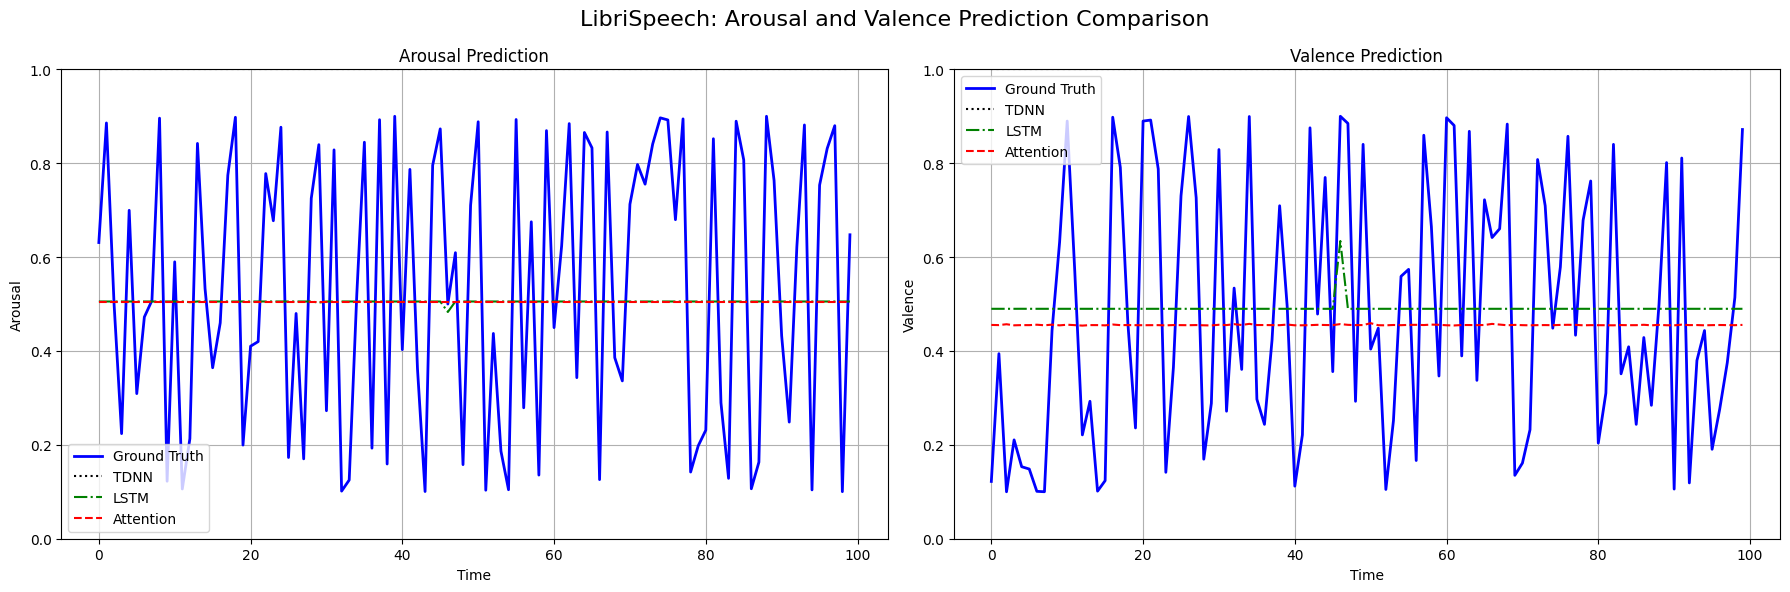

In [57]:
import matplotlib.pyplot as plt

# Sample T indices
T = 100
indices = np.linspace(0, len(y_test_ar) - 1, T, dtype=int)

# Predictions
gt_ar = y_test_ar[indices]
gt_val = y_test_val[indices]

tdnn_ar = model_tdnn_ar.predict(X_test_ar[indices]).flatten()
lstm_ar = model_lstm_ar.predict(X_test_ar[indices]).flatten()
attn_ar = model_attn_ar.predict(X_test_ar[indices]).flatten()

tdnn_val = model_tdnn_val.predict(X_test_val[indices]).flatten()
lstm_val = model_lstm_val.predict(X_test_val[indices]).flatten()
attn_val = model_attn_val.predict(X_test_val[indices]).flatten()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# --- Arousal ---
ax[0].plot(gt_ar, color='blue', linewidth=2, label='Ground Truth')
ax[0].plot(tdnn_ar, linestyle='dotted', color='black', label='TDNN')
ax[0].plot(lstm_ar, linestyle='dashdot', color='green', label='LSTM')
ax[0].plot(attn_ar, linestyle='dashed', color='red', label='Attention')
ax[0].set_title('Arousal Prediction')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Arousal')
ax[0].set_ylim(0, 1)
ax[0].legend()
ax[0].grid(True)

# --- Valence ---
ax[1].plot(gt_val, color='blue', linewidth=2, label='Ground Truth')
ax[1].plot(tdnn_val, linestyle='dotted', color='black', label='TDNN')
ax[1].plot(lstm_val, linestyle='dashdot', color='green', label='LSTM')
ax[1].plot(attn_val, linestyle='dashed', color='red', label='Attention')
ax[1].set_title('Valence Prediction')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Valence')
ax[1].set_ylim(0, 1)
ax[1].legend()
ax[1].grid(True)

plt.suptitle("LibriSpeech: Arousal and Valence Prediction Comparison", fontsize=16)
plt.tight_layout()
plt.show()

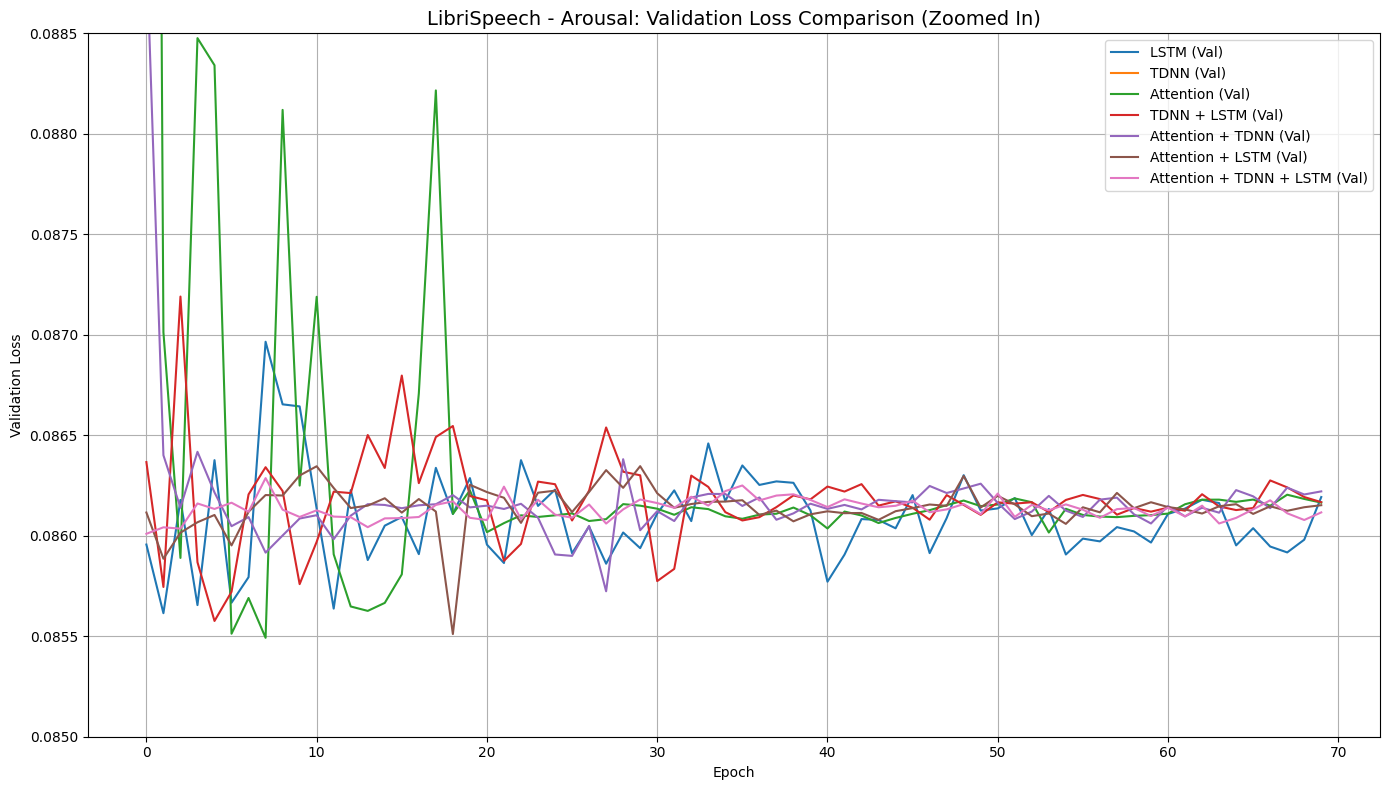

In [54]:
histories = {
    'LSTM': history_lstm_ar,
    'TDNN': history_tdnn_ar,
    'Attention': history_attn_ar,
    'TDNN + LSTM': history_tdnn_lstm_ar,
    'Attention + TDNN': history_attn_tdnn_ar,
    'Attention + LSTM': history_attn_lstm_ar,
    'Attention + TDNN + LSTM': history_final_ar,
}

# Plot
plt.figure(figsize=(14, 8))
for name, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=f'{name} (Val)')

plt.title('LibriSpeech - Arousal: Validation Loss Comparison (Zoomed In)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim(0.085, 0.0885)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

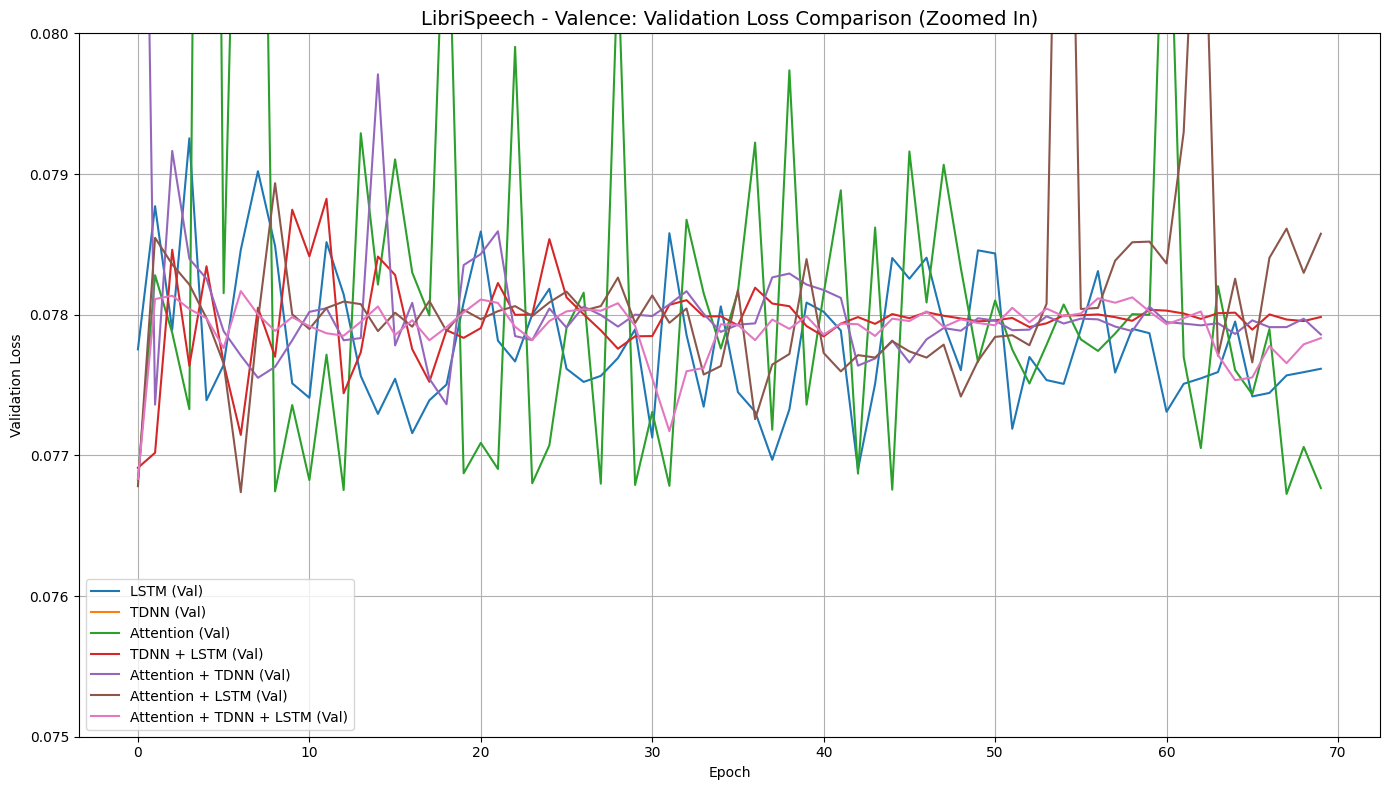

In [63]:
histories_val = {
    'LSTM': history_lstm_val,
    'TDNN': history_tdnn_val,
    'Attention': history_attn_val,
    'TDNN + LSTM': history_tdnn_lstm_val,
    'Attention + TDNN': history_attn_tdnn_val,
    'Attention + LSTM': history_attn_lstm_val,
    'Attention + TDNN + LSTM': history_final_val,
}

# Plot
plt.figure(figsize=(14, 8))
for name, hist in histories_val.items():
    plt.plot(hist.history['val_loss'], label=f'{name} (Val)')

plt.title('LibriSpeech - Valence: Validation Loss Comparison (Zoomed In)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim(0.075, 0.080)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

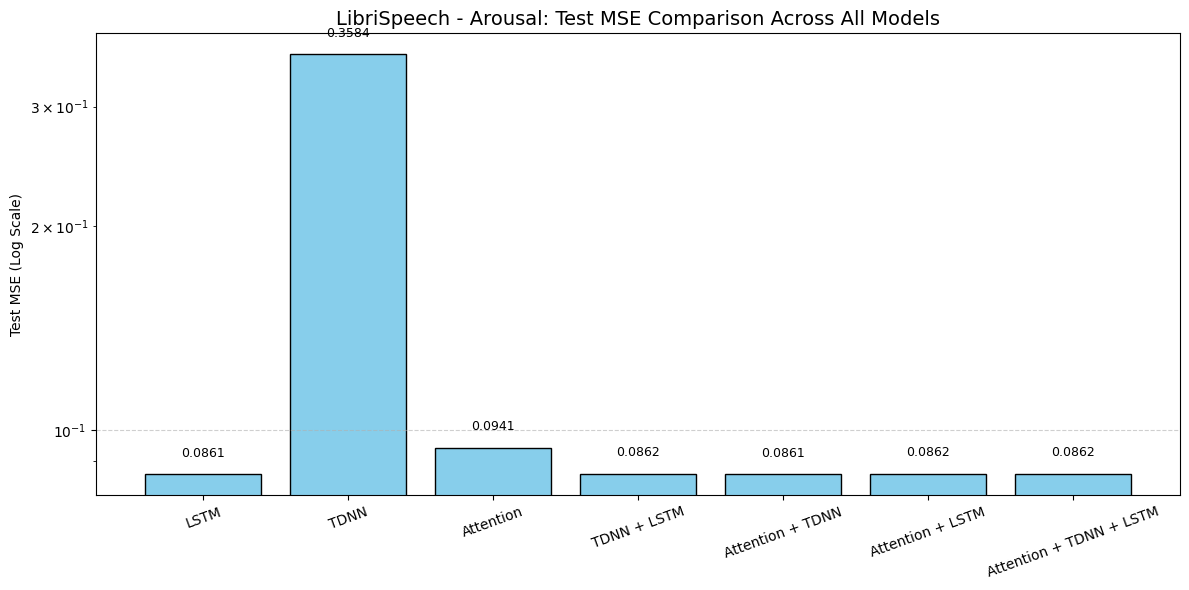

In [55]:
mse_scores = {
    'LSTM': 0.0861,
    'TDNN': 0.3584,
    'Attention': 0.0941,
    'TDNN + LSTM': 0.0862,
    'Attention + TDNN': 0.0861,
    'Attention + LSTM': 0.0862,
    'Attention + TDNN + LSTM': 0.0862
}

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue', edgecolor='black')
plt.title('LibriSpeech - Arousal: Test MSE Comparison Across All Models', fontsize=14)
plt.ylabel('Test MSE (Log Scale)')
plt.xticks(rotation=20)
plt.yscale('log')  # Log scale for clearer small differences
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar, value in zip(bars, mse_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value * 1.05, f"{value:.4f}",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [56]:
mse_scores = {
    'LSTM': 0.0861,
    'TDNN': 0.3584,
    'Attention': 0.0941,
    'TDNN + LSTM': 0.0862,
    'Attention + TDNN': 0.0861,
    'Attention + LSTM': 0.0862,
    'Attention + TDNN + LSTM': 0.0862
}

sorted_losses = sorted(mse_scores.items(), key=lambda x: x[1])

print("\nLibriSpeech - Arousal: Model Ranking (Sorted by Test MSE)")
print("-" * 55)
for i, (name, loss) in enumerate(sorted_losses, 1):
    print(f"{i}. {name:<30} | Test MSE: {loss:.4f}")
print("-" * 55)


LibriSpeech - Arousal: Model Ranking (Sorted by Test MSE)
-------------------------------------------------------
1. LSTM                           | Test MSE: 0.0861
2. Attention + TDNN               | Test MSE: 0.0861
3. TDNN + LSTM                    | Test MSE: 0.0862
4. Attention + LSTM               | Test MSE: 0.0862
5. Attention + TDNN + LSTM        | Test MSE: 0.0862
6. Attention                      | Test MSE: 0.0941
7. TDNN                           | Test MSE: 0.3584
-------------------------------------------------------
